## Loan Default Prediction
### Description
Banks derive a significant portion of their revenue from providing loans, but this practice is often accompanied by the inherent risk of borrowers defaulting on their loans. In order to address this issue, banks have made the decision to leverage Machine Learning as a solution. They have amassed a vast dataset containing historical information about loan borrowers and are seeking assistance in creating a robust ML model capable of categorizing whether a new borrower is likely to default on their loan or not.

The dataset is extensive and encompasses various deterministic factors such as the borrower's income, gender, loan purpose, among others. This dataset exhibits strong multicollinearity among variables, and it may also contain missing data. The challenge is to overcome these obstacles and construct a powerful classifier to predict loan defaulters.


### Objective
Gain a comprehensive understanding of the dataset and conduct necessary data cleanup if required.
Develop a classification model for predicting whether a loan borrower is likely to default or not.
Fine-tune the hyperparameters of the model and compare the evaluation metrics of various classification algorithms to ensure the best predictive performance.

dataset - https://www.kaggle.com/datasets/yasserh/loan-default-dataset/download?datasetVersionNumber=1

In [180]:
#importing necessary libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

from functions import perc_missing

ImportError: cannot import name 'perc_missing' from 'functions' (c:\Users\xtaym\Desktop\VSC projects\default_pred\Loan_Default_Pred-1\functions.py)

In [11]:
#making pandas display all columns
pd.set_option('display.max_columns', None)

#loading data to pandas df
df=pd.read_csv(r'C:\Users\xtaym\Desktop\VSC projects\default_pred\Loan_Default_Pred-1\Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [28]:
#renaming column
df=df.rename(columns={'dtir1':'debt_to_income_rat'})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            109028 

We have 148670 records. Datatypes seem correct, however there are a many na's in the data.

In [30]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

Few variables have considerable amount of NA's. Missing data can by caused in many ways, some of which are:
- Merging of source data sets
- Missing at random
- Failures of measurement

We will visualize NA's in order to better understand its origin and whether or not NA's of different variables are correlated. 

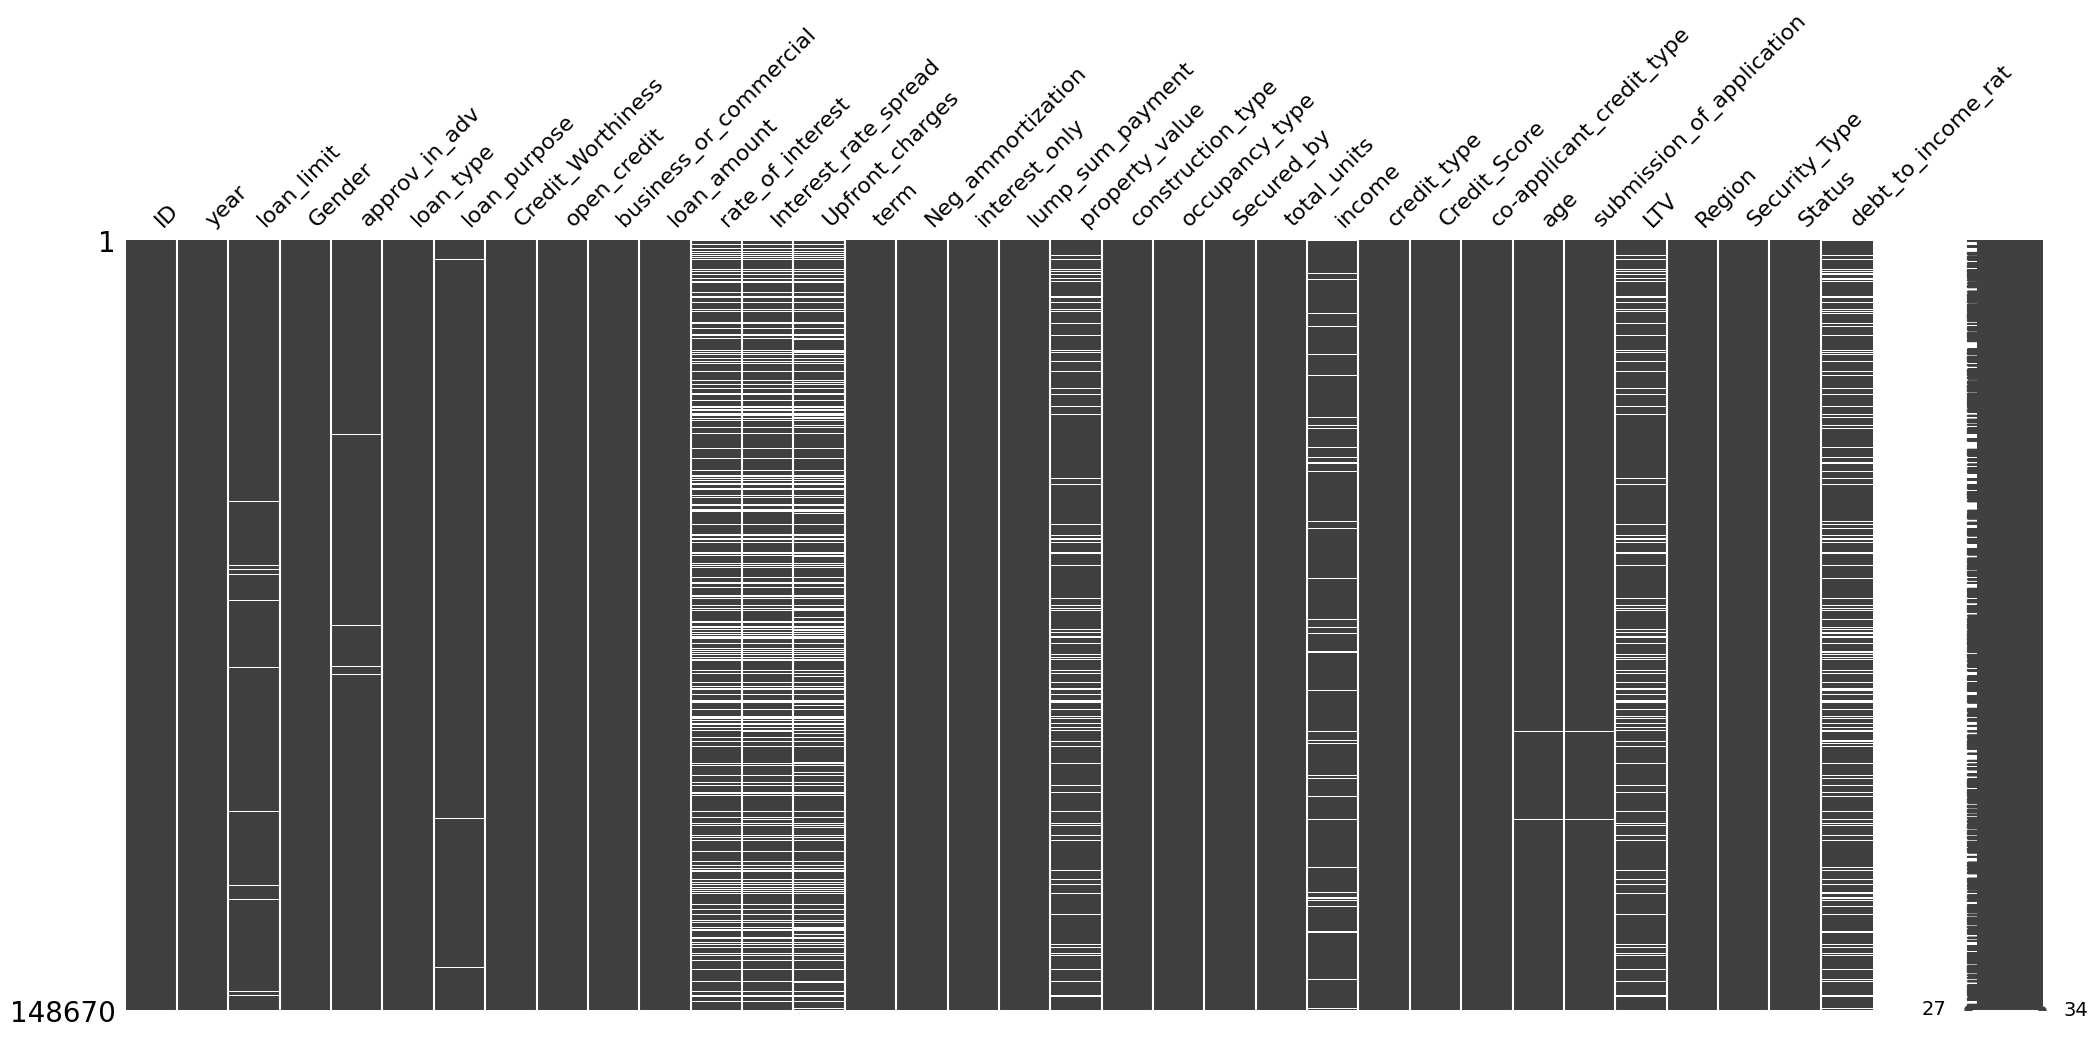

In [31]:
msno.matrix(df)
plt.show()

Few columns NA's occurance seem to becorrelated to eachother. We will explore it further by ploting heatmap.   

<Axes: >

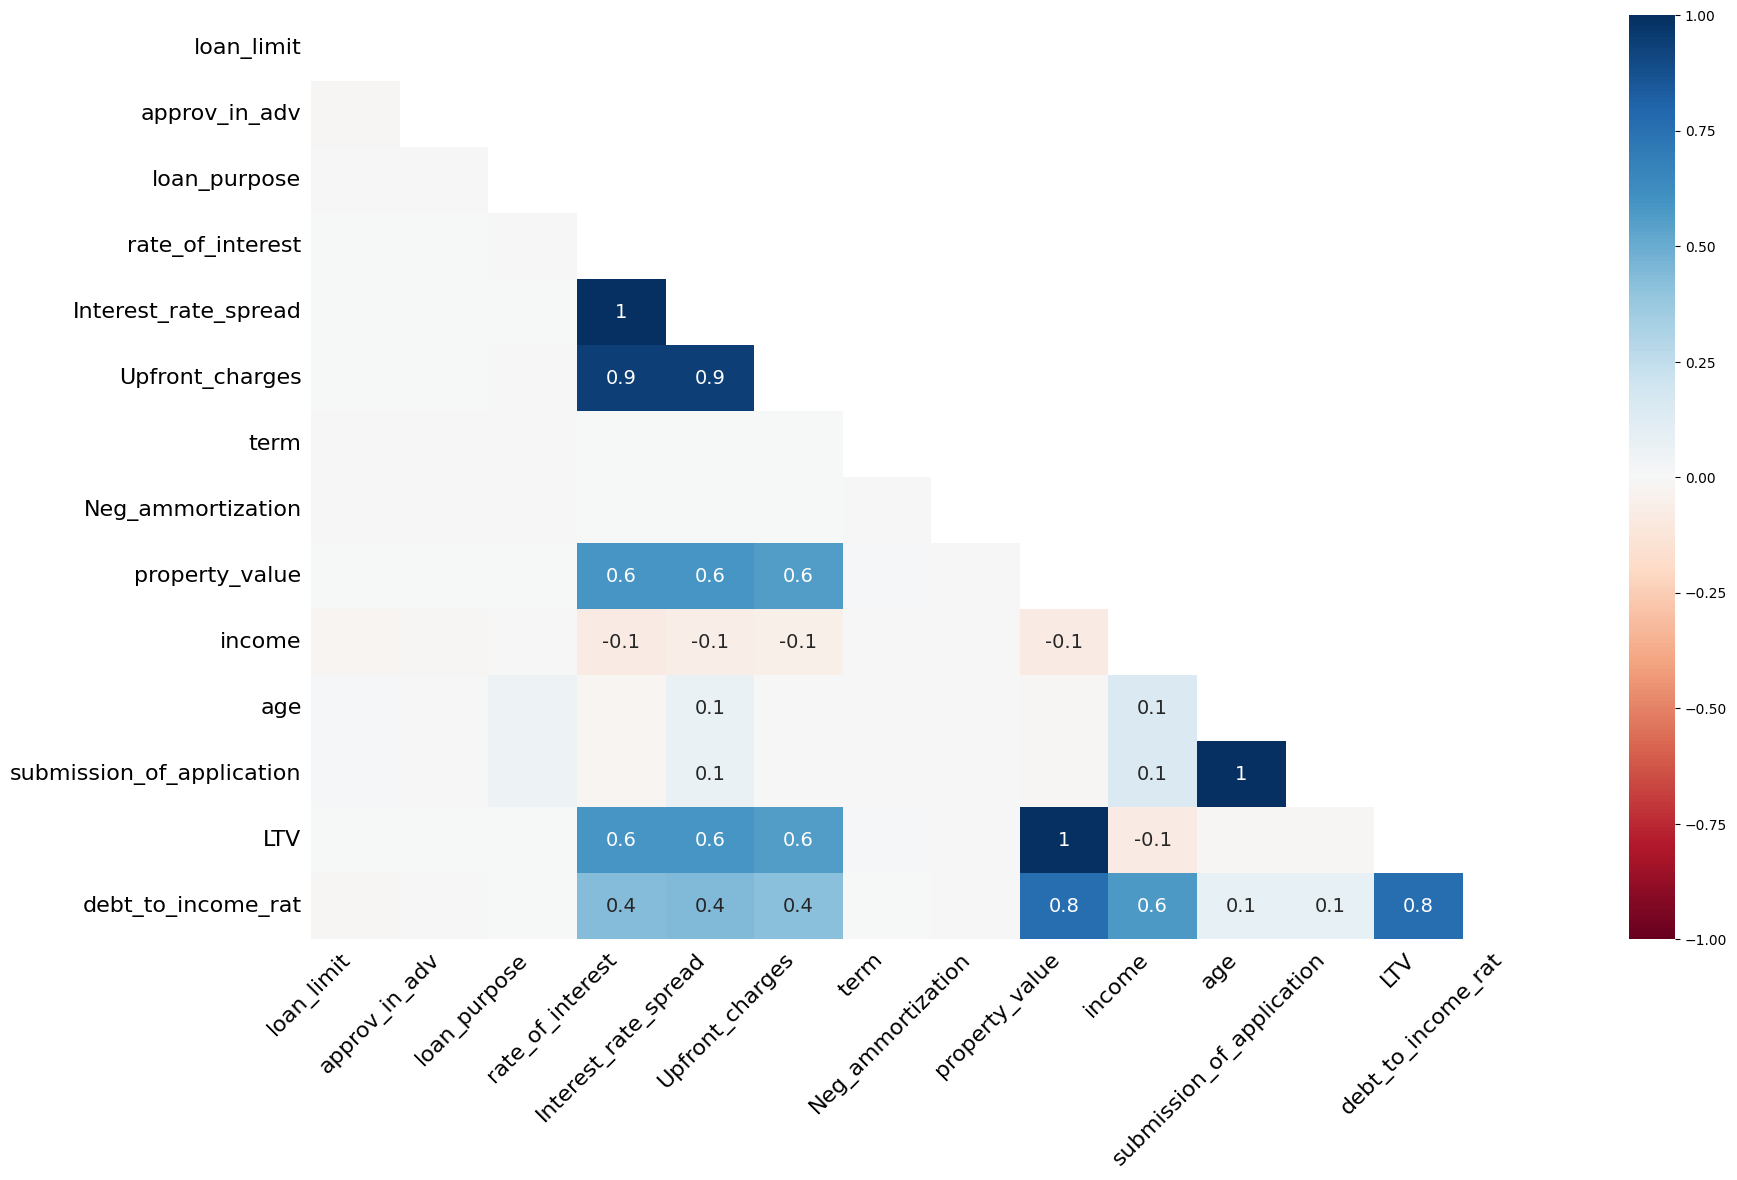

In [32]:
msno.heatmap(df)

In [202]:
def perc_missing(x):
    miss_col=[col for col in x.columns if x[col].isna().sum()>0]
    miss_count=[]
    perc=[]
    count_col=[]
    for col in miss_col:
        count_col.append(len(x[col]))
        miss_count.append(x[col].isna().sum())
        perc.append(round(x[col].isna().sum()/len(x[col]),3))
    to_df=[miss_col,count_col,miss_count,perc]
    data=pd.DataFrame(to_df).T
    data.columns= ['var_name','N','NA count','NA (%)']
    return(data.sort_values('NA (%)',ascending=False))


In [203]:
perc_missing(df)

,var_name,N,NA count,NA (%)
5,Upfront_charges,148670,39642,0.267
4,Interest_rate_spread,148670,36639,0.246
3,rate_of_interest,148670,36439,0.245
13,debt_to_income_rat,148670,24121,0.162
8,property_value,148670,15098,0.102
12,LTV,148670,15098,0.102
9,income,148670,9150,0.062
0,loan_limit,148670,3344,0.022
1,approv_in_adv,148670,908,0.006
2,loan_purpose,148670,134,0.001
